# **Practical 7**

# **Clustering Greatest Movies of All Time Clustering News Articles**

In [1]:
# import urllib2
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn


pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster') 


In [2]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

In [3]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

In [4]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True


In [5]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))


In [6]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True


### Cleaning the dataset


In [7]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<1990:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [8]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1
    


c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))
        

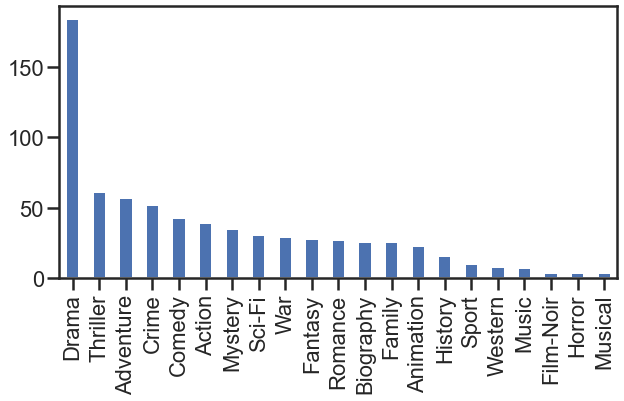

In [10]:
plot_column('Genre')

In [11]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [12]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,1,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


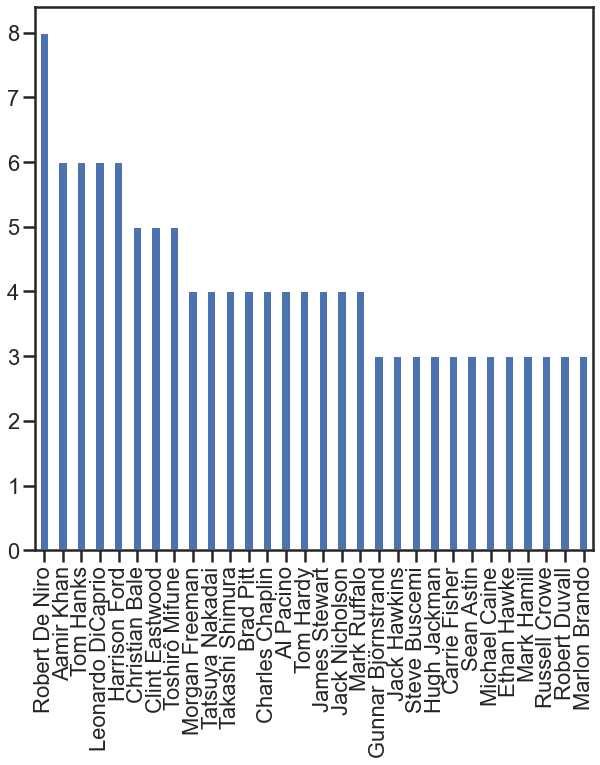

In [13]:
plot_column('Actors',30)

In [14]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]
        

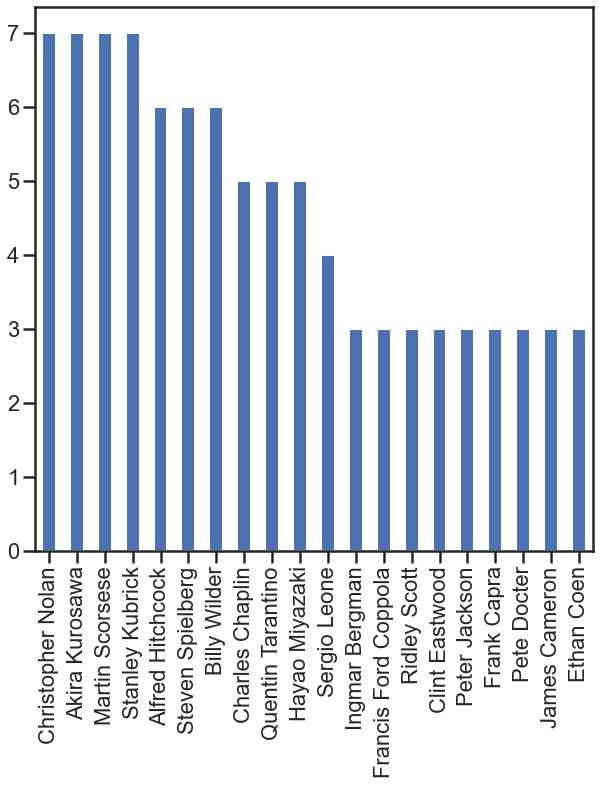

In [15]:
plot_column('Director',20)

In [16]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]    

In [17]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers   

,Gamora & Drax created by),Gamora and Drax created by),Vengeance Trilogy),Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolfo Franci,Adolph Green,Adrian Molina,Agatha Christie,Agenore Incrocci,Akhilesh Jaiswal,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,Al Boasberg,Alan Ball,Alan Mak,Albert Hackett,Alec Coppel,Alec Sokolow,Ales Adamovich,Amole Gupte,Amy Poehler,Andrei Tarkovsky,Andrew Kevin Walker,Andrew Knight,Andrew Niccol,Andrew Stanton,Andrey Konchalovskiy,Andy Gaskill,Anthony Burgess,Anthony Tambakis,Anton Chekhov,Anurag Kashyap,Arijit Biswas,Arkadiy Strugatskiy,Arthur C. Clarke,Asghar Farhadi,Ashley Montagu,Ashutosh Gowariker,B. Traven,Barry Johnson,Ben Affleck,Bernardo Bertolucci,Bernd Eichinger,Betty Comden,Bill Finger,Bill Hader,...,Terence Winter,Terry George,Terry Gilliam,Terry Jones,Terry Rossio,Terry Southern,Thea von Harbou,Thom Enriquez,Thomas Harris,Thomas Keneally,Thomas Narcejac,Thomas Vinterberg,Tobias Lindholm,Todd Phillips,Tom McCarthy,Tom Schulman,Tom Sito,Traudl Junge,Uma Thurman,Upendra Sidhaye,Upton Sinclair,Valérie Beaugrand-Champagne,Vanna Paoli,Vidhu Vinod Chopra,Vincenzo Cerami,Vittorio De Sica,W.R. Burnett,Wajdi Mouawad,Walter Donohue,Walter Hill,Walter Newman,Wes Anderson,William Davies,William Goldman,William Makepeace Thackeray,William Monahan,William Nicholson,William Shakespeare,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Yasuhiko Takiguchi,Yasujirô Ozu,Yavuz Turgul,Yogesh Chandekar,Zach Lewis,Zeishan Quadri,Çagan Irmak,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


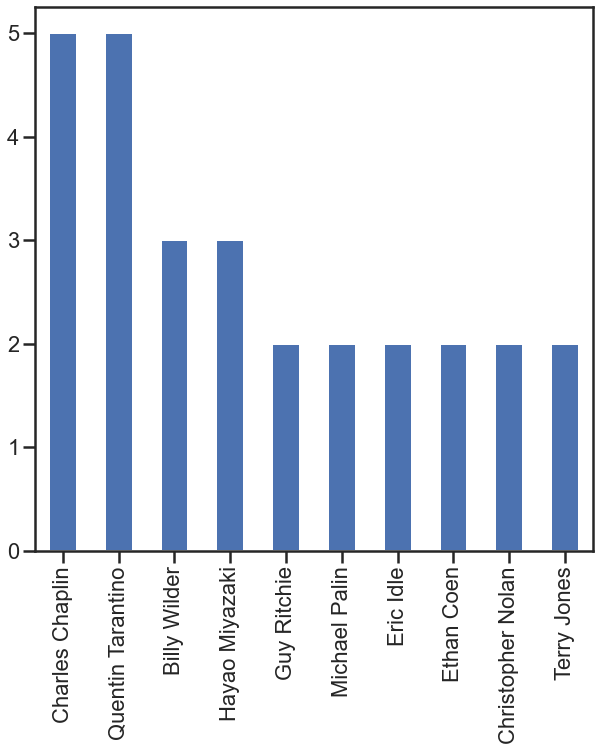

In [18]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

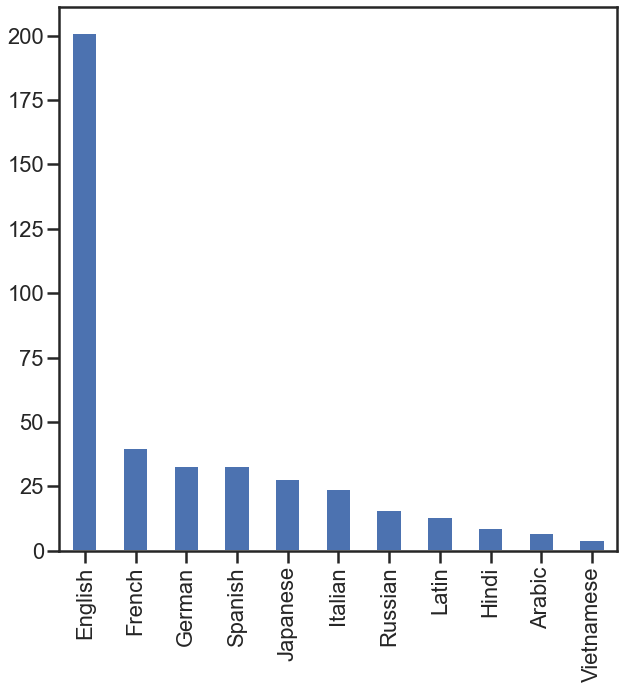

In [19]:
plot_column('Language',11)

In [20]:
df_omdb.shape

(250, 96)

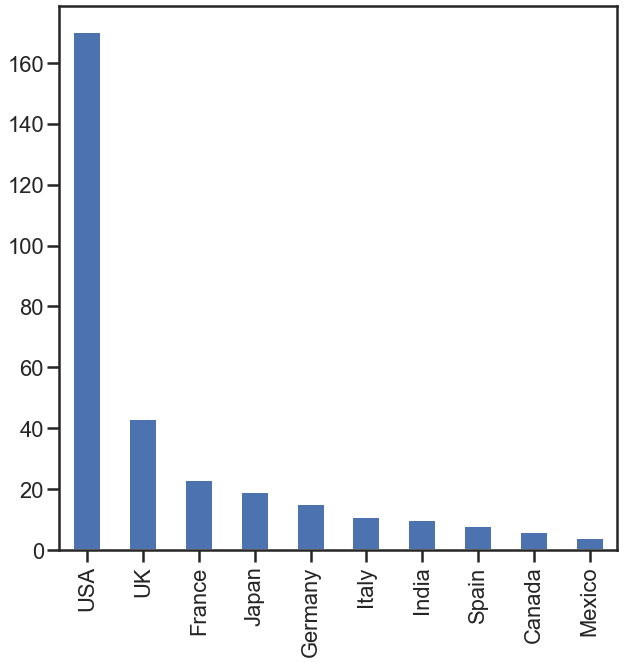

In [21]:
plot_column('Country',10)

In [22]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [23]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Aamir Khan,Actor:Tom Hanks,Actor:Leonardo DiCaprio,...,Actor:Takashi Shimura,Actor:Brad Pitt,Actor:Charles Chaplin,Actor:Al Pacino,Actor:Tom Hardy,Actor:James Stewart,Actor:Jack Nicholson,Actor:Mark Ruffalo,Actor:Gunnar Björnstrand,Actor:Jack Hawkins,Actor:Steve Buscemi,Actor:Hugh Jackman,Actor:Carrie Fisher,Actor:Sean Astin,Actor:Michael Caine,Actor:Ethan Hawke,Actor:Mark Hamill,Actor:Russell Crowe,Actor:Robert Duvall,Actor:Marlon Brando,Director:Christopher Nolan,Director:Akira Kurosawa,Director:Martin Scorsese,Director:Stanley Kubrick,Director:Alfred Hitchcock,Director:Steven Spielberg,Director:Billy Wilder,Director:Charles Chaplin,Director:Quentin Tarantino,Director:Hayao Miyazaki,Director:Sergio Leone,Director:Ingmar Bergman,Director:Francis Ford Coppola,Director:Ridley Scott,Director:Clint Eastwood,Director:Peter Jackson,Director:Frank Capra,Director:Pete Docter,Director:James Cameron,Director:Ethan Coen,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Mexico
0,The Shawshank Redemption,1,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures

In [24]:
## Function for text cleaning,tokenizing,lemmatizing and POS Tagging

def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens


In [25]:
n_plots = len(df_omdb['Plot']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = df_omdb['Plot'].map(str) # place all text reviews in reviews
tfidf=True

In [26]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

# Create Word Frequency by Review Matrix using Custom Analyzer
cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")


Terms with Highest Frequency:
tell            2145
find            1709
back            1369
see             1368
man             1236
say             1077
time            1040
two             1034
kill            1002
try              993
come             992
give             992
life             897
know             864
call             804
men              791
look             777
get              774
new              748
day              746
begin            737
year             734
want             724
work             724
father           722
return           697
meet             692
room             689
away             682
name             664
run              660
help             651
also             641
home             641
car              617
old              605
like             595
way              585
police           575
head             574
however          566
turn             563
wife             563
young            561
first            556
friend           553
wom

In [27]:
# if tfidf is requested, replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')
        
    

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 250  rows, and 5389  columns.
The Term list has 5389  terms.

Terms with Highest TF-IDF Scores:
kill               7.07
father             7.00
family             5.89
police             5.82
men                5.74
son                5.42
wife               5.12
child              5.10
car                5.05
old                4.84
young              4.82
home               4.80
friend             4.78
mother             4.73
room               4.72
woman              4.64
love               4.55
war                4.54
boy                4.54
money              4.44
run                4.33
live               4.12
train              4.11
german             4.07
night              4.06
fight              3.97
film               3.93
house              3.90
brother            3.88
story              3.87
girl               3.87
world              3.80
murder             3.77
show               3.77
gang        

In [28]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)

In [29]:
## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [30]:
## Taking top words from the entire dataframe
words_df = freq.t.T
top_words = ["young", "man", "help", "life", "war", "police", "family", "journey", 
             "jewish", "son", "boy", "world", "love", "save", "dark", "friends", "murder"]
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jay s khatri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [31]:
df_final2 = pd.concat([df_omdb, df_encoded], axis=1)
df_final2 = df_final2.drop(['Released','Genre','Director','Writer','Actors','Plot','Language',\
                          'Country','Awards','Poster','Ratings','Metascore','imdbVotes','imdbID','Type',\
                         'DVD','BoxOffice','Production','Website','Response','Rated','imdbRating'],axis = 1)

In [32]:
df_final2.dropna(inplace=True)
print(df_final2.shape)
df_final2.head()
df_dbscan=df_final2

(250, 101)


In [33]:
df_final2.head()

,Title,Year,Runtime,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Aamir Khan,Actor:Tom Hanks,Actor:Leonardo DiCaprio,Actor:Harrison Ford,Actor:Christian Bale,Actor:Clint Eastwood,Actor:Toshirô Mifune,Actor:Morgan Freeman,Actor:Tatsuya Nakadai,Actor:Takashi Shimura,Actor:Brad Pitt,Actor:Charles Chaplin,Actor:Al Pacino,Actor:Tom Hardy,Actor:James Stewart,Actor:Jack Nicholson,Actor:Mark Ruffalo,Actor:Gunnar Björnstrand,Actor:Jack Hawkins,Actor:Steve Buscemi,Actor:Hugh Jackman,Actor:Carrie Fisher,Actor:Sean Astin,Actor:Michael Caine,Actor:Ethan Hawke,...,Actor:Russell Crowe,Actor:Robert Duvall,Actor:Marlon Brando,Director:Christopher Nolan,Director:Akira Kurosawa,Director:Martin Scorsese,Director:Stanley Kubrick,Director:Alfred Hitchcock,Director:Steven Spielberg,Director:Billy Wilder,Director:Charles Chaplin,Director:Quentin Tarantino,Director:Hayao Miyazaki,Director:Sergio Leone,Director:Ingmar Bergman,Director:Francis Ford Coppola,Director:Ridley Scott,Director:Clint Eastwood,Director:Peter Jackson,Director:Frank Capra,Director:Pete Docter,Director:James Cameron,Director:Ethan Coen,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Mexico,young,man,help,life,war,police,family,journey,jewish,son,boy,world,love,save,dark,friends,murder
0,The Shawshank Redemption,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,The Godfather,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,1
2,The Godfather: Part II,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
3,The Dark Knight,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1
4,12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1


In [34]:
df_matrix = df_final2.drop('Title',axis=1).to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

In [35]:
df_matrix

array([[ 0.89362249,  0.968496  , -0.42992339, ..., -0.63599873,
         2.13437475,  1.35680105],
       [-1.11904077,  0.968496  , -0.42992339, ..., -0.63599873,
        -0.46852129,  1.35680105],
       [-1.11904077,  0.968496  , -0.42992339, ..., -0.63599873,
        -0.46852129,  1.35680105],
       ...,
       [ 0.89362249, -1.03252879, -0.42992339, ...,  1.57233019,
        -0.46852129, -0.73702773],
       [-1.11904077, -1.03252879, -0.42992339, ..., -0.63599873,
        -0.46852129,  1.35680105],
       [ 0.89362249, -1.03252879,  2.32599579, ..., -0.63599873,
        -0.46852129, -0.73702773]])

In [36]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

37
['0.05', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7363745394522139


In [37]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

37
['0.05', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7363745394522139


In [38]:
first_comp = pca39.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final2.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_39_features=first_comps
Top_39_features

,weights,features,abs_weights
3,0.319172,genre:Action,0.319172
10,0.317457,genre:Family,0.317457
4,0.272537,genre:Adventure,0.272537
8,-0.262717,genre:Crime,0.262717
9,0.234322,genre:Drama,0.234322
...,...,...,...
64,0.004263,Director:Sergio Leone,0.004263
74,-0.004029,Country:USA,0.004029
17,0.003561,genre:Mystery,0.003561
92,-0.003215,jewish,0.003215


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Xpca=pca39.transform(df_matrix)

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))
            


2 1: 0.006857019593691654
3 1: 0.03168009983931171
3 2: -0.24328244805038868
3 3: -0.26622515199283575
4 1: 0.0403453283293709
4 2: -0.04985061878423066
4 3: -0.035757868290219486
5 1: 0.08464531750761191
5 2: 0.07787344228115757
5 3: 0.03383216274393153
6 1: 0.14586809328812764
6 2: 0.15747774074926382
6 3: 0.11086978782907449
6 4: 0.10636707104887722
7 1: 0.1167240952487043
7 2: 0.1723054600803482
7 3: 0.17106183687154725
8 1: 0.16598271882354687
8 2: 0.28643299556239066
8 3: 0.2746843173253093
9 1: 0.2594392670811573
9 2: 0.3059130482910084
9 3: 0.3039456366667655
10 1: 0.3214972531798544
10 2: 0.3214972531798544
10 3: 0.3214972531798544


In [40]:
from sklearn import metrics
db = DBSCAN(eps=6, min_samples=3).fit(Xpca)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))


Estimated number of clusters: 13
Silhouette Coefficient: 0.111


In [41]:
#Performing Clustering with DBSCAN

db = DBSCAN(eps=6, min_samples=3).fit(Xpca)
y = DBSCAN(eps=6, min_samples=3).fit_predict(Xpca)
dbscanlabels= db.labels_


In [42]:
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [43]:
movie_name = df_final2.Title
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])

[ 27  65 133 140 222]
5
27                          Spirited Away
65                      Princess Mononoke
133                  Howl's Moving Castle
140                    My Neighbor Totoro
222    Nausicaä of the Valley of the Wind
Name: Title, dtype: object


In [44]:
films_dbscan = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

 0     135
-1      73
 10      5
 5       5
 7       4
 4       4
 12      3
 11      3
 1       3
 9       3
 8       3
 6       3
 3       3
 2       3
Name: cluster, dtype: int64

In [45]:
#Clustering with kmeans as k=13
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans(n_clusters=13,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)


In [46]:
films_kmeans = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)


12    112
2      37
1      37
8      21
3       9
4       7
0       7
6       4
5       4
11      3
10      3
9       3
7       3
Name: cluster, dtype: int64

In [47]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.iloc[i]['title']:
        print('%s' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()


Top terms per cluster:

Cluster 0 words: genre:Adventure, Runtime, Actor:Ethan Hawke, genre:Crime, Director:Ingmar Bergman, save,

Cluster 0 titles:The Shawshank Redemption

Cluster 1 words: genre:Family, genre:Action, Actor:Leonardo DiCaprio, Year, Runtime, love,

Cluster 1 titles:The Godfather

Cluster 2 words: Actor:Leonardo DiCaprio, genre:Romance, genre:Drama, Actor:Charles Chaplin, love, journey,

Cluster 2 titles:The Godfather: Part II

Cluster 3 words: Runtime, genre:Comedy, love, save, man, Country:Germany,

Cluster 3 titles:The Dark Knight

Cluster 4 words: genre:Crime, save, Actor:Charles Chaplin, Director:Frank Capra, genre:Drama, Actor:Leonardo DiCaprio,

Cluster 4 titles:12 Angry Men

Cluster 5 words: Actor:Ethan Hawke, genre:Drama, genre:Romance, Year, genre:Comedy, save,

Cluster 5 titles:Schindler's List

Cluster 6 words: Runtime, genre:Romance, genre:Crime, genre:Drama, Director:Quentin Tarantino, genre:Action,

Cluster 6 titles:The Lord of the Rings: The Return of th